<a href="https://colab.research.google.com/github/leesm0409/bootcamp/blob/main/09_(1)CIFAR_10_%EB%AC%BC%EC%B2%B4_%EC%A2%85%EB%A5%98_%EC%9D%B4%EB%AF%B8%EC%A7%80_(0~9)_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR-10 물체 종류 이미지 (0~9) 분류하기

## 데이터 준비하기

In [ ]:
from tensorflow.keras.datasets import cifar10

# 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

170498071/170498071 [==============================] - 14s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


## 데이터 그려보기

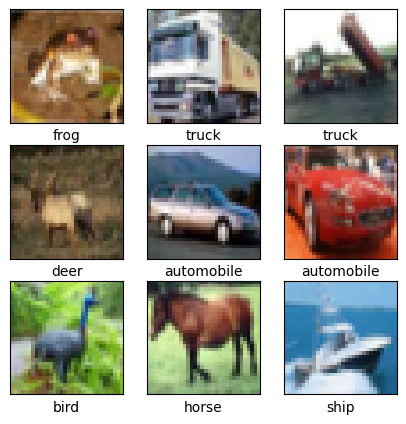

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

class_names = ['airplane', 'automobile', 'bird', 'cat',
              'deer', 'dog', 'frog', 'horse',
              'ship', 'truck']

sample_size = 9
random_idx = np.random.randint(60000, size=sample_size)

plt.figure(figsize = (5, 5))
for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap = 'gray')
    plt.xlabel(class_names[int(y_train[i])])
plt.show()

## 데이터 전처리

In [ ]:
# 평균과 표준편차는 채널별로 구해줍니다.
x_mean = np.mean(x_train, axis = (0, 1, 2))
x_std = np.std(x_train, axis = (0, 1, 2))

# 스케일링 (Standardization)
x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3)

print(x_train.shape, len(y_train))
print(x_val.shape, len(y_val))

(35000, 32, 32, 3) 35000
(15000, 32, 32, 3) 15000


## CIFAR-10 이미지 분류를 위한 CNN 모델 구성

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras.optimizers import Adam

model = Sequential()
# (32, 32, 3)의 데이터를 입력으로 받습니다.
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3))) #RGB
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

## 모델 설정하기

In [ ]:
model.compile(optimizer = Adam(1e-4),
             loss = 'sparse_categorical_crossentropy', #원-핫 인코딩 사용하지 않는 경우 (0-9 레이블 그대로 사용하는 경우)
             metrics = ['acc'])

## 모델 학습하기

In [ ]:
history = model.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/30
1094/1094 [==============================] - 16s 7ms/step - loss: 1.6379 - acc: 0.4102 - val_loss: 1.3784 - val_acc: 0.5028
Epoch 2/30
1094/1094 [==============================] - 7s 7ms/step - loss: 1.2735 - acc: 0.5483 - val_loss: 1.2126 - val_acc: 0.5661
Epoch 3/30
1094/1094 [==============================] - 9s 9ms/step - loss: 1.0997 - acc: 0.6142 - val_loss: 1.0352 - val_acc: 0.6319
Epoch 4/30
1094/1094 [==============================] - 9s 9ms/step - loss: 0.9678 - acc: 0.6609 - val_loss: 1.0346 - val_acc: 0.6406
Epoch 5/30
1094/1094 [==============================] - 9s 8ms/step - loss: 0.8691 - acc: 0.6972 - val_loss: 0.9182 - val_acc: 0.6807
Epoch 6/30
1094/1094 [==============================] - 8s 8ms/step - loss: 0.7732 - acc: 0.7328 - val_loss: 0.8540 - val_acc: 0.7011
Epoch 7/30
1094/1094 [==============================] - 7s 6ms/step - loss: 0.7014 - acc: 0.7589 - val_loss: 0.8442 - val_acc: 0.7056
Epoch 8/30
1094/1094 [==============================] - 8s 7m

## 학습 결과 분석

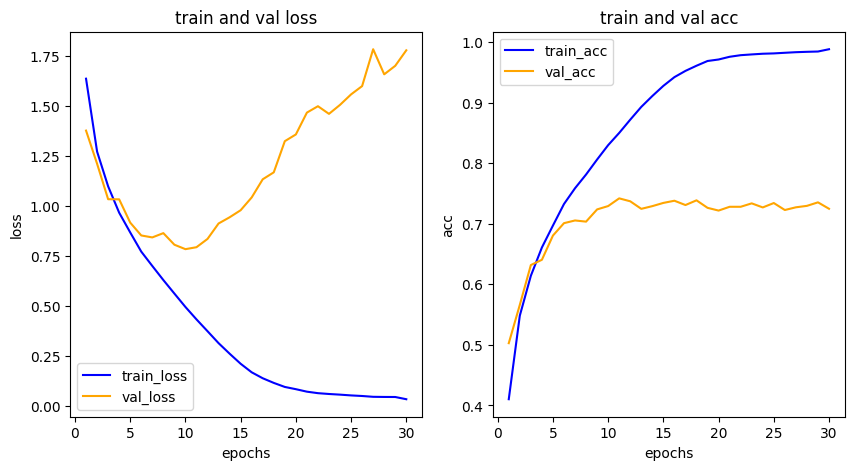

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

## 모델 평가하기

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.8244 - acc: 0.7233


[1.824446678161621, 0.7232999801635742]

## 모델 학습 결과



*   학습 10번 이후 과대 적합
*   과대 적합 피하고, 정확도는 높이기
*   과대 적합 피하는 방법 -> 모델 수정 (드롭아웃(dropout) 추가)


## 드롭아웃 추가한 CNN 모델 구성

In [ ]:
from keras.layers import Dropout

model = Sequential()
# (32, 32, 3)의 데이터를 입력으로 받습니다.
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3))) #RGB
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

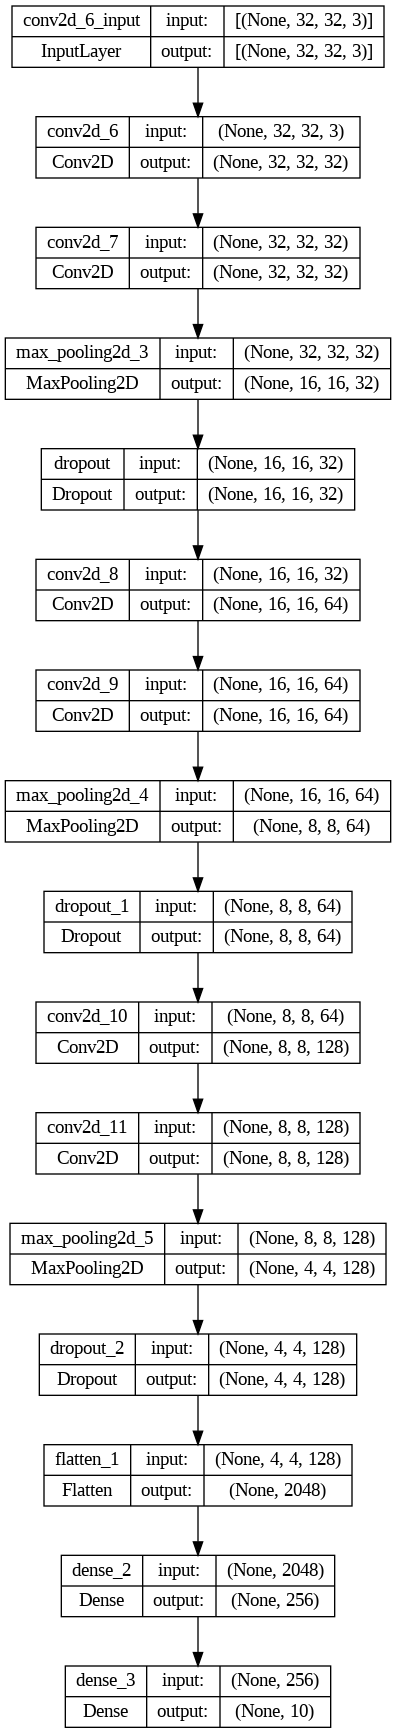

In [ ]:
from keras.utils import plot_model

plot_model(model, 'model.png' ,show_shapes=True)

## 모델 설정 및 학습하기

In [ ]:
model.compile(optimizer = Adam(1e-4),
             loss = 'sparse_categorical_crossentropy', #원-핫 인코딩 사용하지 않는 경우 (0-9 레이블 그대로 사용하는 경우)
             metrics = ['acc'])

history = model.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 32,
                    validation_data = (x_val, y_val))


Epoch 1/30
1094/1094 [==============================] - 9s 7ms/step - loss: 1.7322 - acc: 0.3709 - val_loss: 1.4125 - val_acc: 0.4891
Epoch 2/30
1094/1094 [==============================] - 8s 7ms/step - loss: 1.3636 - acc: 0.5129 - val_loss: 1.2604 - val_acc: 0.5429
Epoch 3/30
1094/1094 [==============================] - 8s 7ms/step - loss: 1.1972 - acc: 0.5747 - val_loss: 1.1067 - val_acc: 0.6095
Epoch 4/30
1094/1094 [==============================] - 7s 7ms/step - loss: 1.0842 - acc: 0.6162 - val_loss: 1.0411 - val_acc: 0.6288
Epoch 5/30
1094/1094 [==============================] - 8s 8ms/step - loss: 0.9983 - acc: 0.6482 - val_loss: 0.9490 - val_acc: 0.6655
Epoch 6/30
1094/1094 [==============================] - 9s 8ms/step - loss: 0.9287 - acc: 0.6737 - val_loss: 0.9032 - val_acc: 0.6827
Epoch 7/30
1094/1094 [==============================] - 10s 9ms/step - loss: 0.8648 - acc: 0.6966 - val_loss: 0.9049 - val_acc: 0.6833
Epoch 8/30
1094/1094 [==============================] - 11s 1

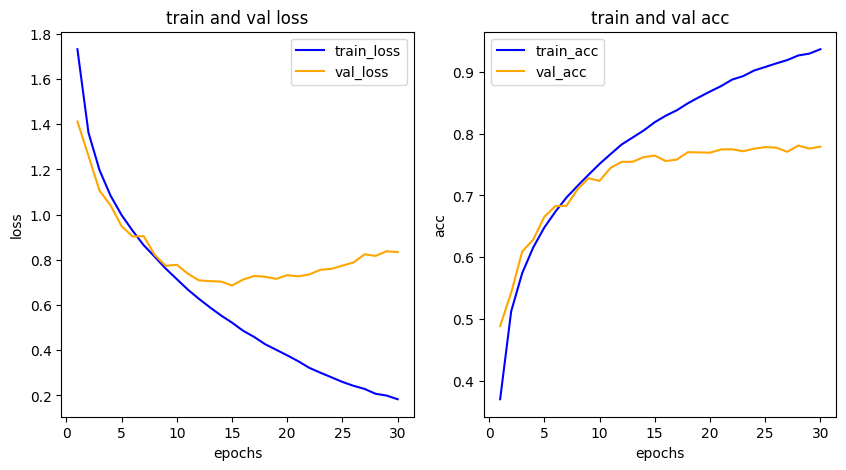

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

## 모델 평가하기

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.8653 - acc: 0.7692


[0.8652600646018982, 0.7692000269889832]

## 최종 모델 구성 및 학습

In [ ]:
from keras.layers import Dropout

model = Sequential()
# (32, 32, 3)의 데이터를 입력으로 받습니다.
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3))) #RGB
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

model.compile(optimizer = Adam(1e-4),
             loss = 'sparse_categorical_crossentropy', #원-핫 인코딩 사용하지 않는 경우 (0-9 레이블 그대로 사용하는 경우)
             metrics = ['acc'])

history = model.fit(x_train, y_train,
                    epochs = 15,
                    batch_size = 32,
                    validation_data = (x_val, y_val))


Epoch 1/15
1094/1094 [==============================] - 10s 9ms/step - loss: 1.7376 - acc: 0.3660 - val_loss: 1.4955 - val_acc: 0.4593
Epoch 2/15
1094/1094 [==============================] - 7s 7ms/step - loss: 1.3788 - acc: 0.5035 - val_loss: 1.2808 - val_acc: 0.5369
Epoch 3/15
1094/1094 [==============================] - 8s 7ms/step - loss: 1.2154 - acc: 0.5662 - val_loss: 1.1565 - val_acc: 0.5870
Epoch 4/15
1094/1094 [==============================] - 8s 7ms/step - loss: 1.0981 - acc: 0.6083 - val_loss: 1.0256 - val_acc: 0.6369
Epoch 5/15
1094/1094 [==============================] - 8s 7ms/step - loss: 1.0051 - acc: 0.6416 - val_loss: 0.9719 - val_acc: 0.6597
Epoch 6/15
1094/1094 [==============================] - 8s 7ms/step - loss: 0.9252 - acc: 0.6744 - val_loss: 0.9181 - val_acc: 0.6781
Epoch 7/15
1094/1094 [==============================] - 7s 7ms/step - loss: 0.8615 - acc: 0.6963 - val_loss: 0.8410 - val_acc: 0.7067
Epoch 8/15
1094/1094 [==============================] - 8s 7m

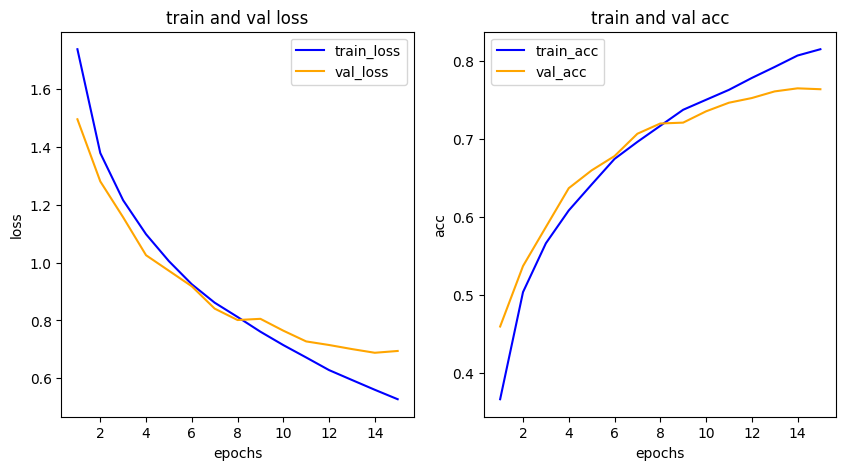

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.7110 - acc: 0.7592


[0.7109665274620056, 0.7591999769210815]

## 정확도가 높은 분류 모델 구성 - 전이학습 모델

*   과대 적합 피하고, 정확도는 높이기
*   VGG16(Visual Geometry Group) 모델을 활용한 분류 모델 구성



In [ ]:
from keras.models import Sequential
from keras.applications import VGG16
from keras.layers import Conv2D, GlobalAveragePooling2D, Dropout, Flatten, Dense
from keras.optimizers import Adam

# 전이 학습 모델 가져오기
pre_trained_vgg = VGG16(input_shape=(32,32,3), include_top=False, weights='imagenet')
pre_trained_vgg.summary()

# 분류모델 합치기
model = Sequential()
model.add(pre_trained_vgg)
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 conv2d_20 (Conv2D)          (None, 1, 1, 128)         589952    
                                                                 
 conv2d_21 (Conv2D)          (None, 1, 1, 128)         147584    
                                                                 
 global_average_pooling2d_1   (None, 128)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 flatten_3 (Flatten)         (None, 128)               0         
                                                      

In [ ]:
model.compile(optimizer = Adam(1e-4),
             loss = 'sparse_categorical_crossentropy', #원-핫 인코딩 사용하지 않는 경우 (0-9 레이블 그대로 사용하는 경우)
             metrics = ['acc'])

history = model.fit(x_train, y_train,
                    epochs = 15,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/15
1094/1094 [==============================] - 45s 39ms/step - loss: 1.0276 - acc: 0.6459 - val_loss: 0.6652 - val_acc: 0.7766
Epoch 2/15
1094/1094 [==============================] - 36s 33ms/step - loss: 0.5913 - acc: 0.8054 - val_loss: 0.6297 - val_acc: 0.7831
Epoch 3/15
1094/1094 [==============================] - 37s 34ms/step - loss: 0.4348 - acc: 0.8578 - val_loss: 0.4937 - val_acc: 0.8378
Epoch 4/15
1094/1094 [==============================] - 36s 33ms/step - loss: 0.3189 - acc: 0.8961 - val_loss: 0.4850 - val_acc: 0.8432
Epoch 5/15
1094/1094 [==============================] - 36s 33ms/step - loss: 0.2375 - acc: 0.9215 - val_loss: 0.5380 - val_acc: 0.8453
Epoch 6/15
1094/1094 [==============================] - 36s 33ms/step - loss: 0.1754 - acc: 0.9437 - val_loss: 0.5438 - val_acc: 0.8422
Epoch 7/15
1094/1094 [==============================] - 36s 33ms/step - loss: 0.1312 - acc: 0.9579 - val_loss: 0.5927 - val_acc: 0.8437
Epoch 8/15
1094/1094 [==========================

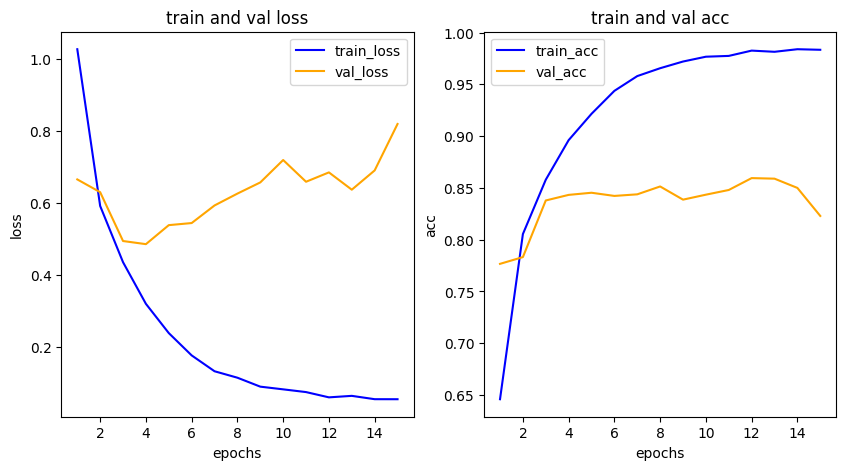

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.8461 - acc: 0.8242


[0.8461283445358276, 0.8241999745368958]